# Post-hoc Z-Score Analysis of Principal Indicators in Overeating Clusters

This section visualizes the **principal indicators** of overeating clusters using a **circular barplot (Circos plot)**.  
The analysis is based on **z-scores** of features, allowing us to identify which indicators are most strongly associated with each overeating cluster.

---

## Purpose
- To examine which **EMA features** and contextual variables distinguish clusters of overeating behavior.  
- To highlight features with **large deviations** from the mean across participants.  
- To support interpretation of the latent clusters discovered in earlier analyses (UMAP + clustering).

---

## Method
1. **Input data**:  
   - `ema_zscores_posthoc_phenotype_analysis.xlsx` containing normalized feature scores across overeating clusters.  

2. **Z-score computation**:  
   - Each feature was standardized, producing a distribution centered at 0 with unit variance.  
   - The focus is on features with **|Z-score| ≥ 1**, indicating at least one standard deviation above or below the mean.  

3. **Circos visualization**:  
   - Each **sector** of the circle corresponds to an overeating cluster.  
   - Bars represent feature-level z-scores for that cluster.  
   - Horizontal dashed lines mark thresholds at Z = ±1.  
   - Feature labels are displayed radially around each sector.  

4. **Legend annotation**:  
   - Bold labels indicate features where **|Z-score| ≥ 1**, highlighting **principal indicators** of overeating for that cluster.  

---

## Interpretation
- **Positive z-scores** → features more prevalent/stronger in the cluster compared to the sample average.  
- **Negative z-scores** → features less prevalent/weaker in the cluster compared to the sample average.  
- Features exceeding ±1 provide **post-hoc insights** into cluster-level differences, helping interpret behavioral or contextual signatures of overeating episodes.  

---

## Output
- A **polar circos plot** saved 
- The visualization provides a **cluster-wise “fingerprint”** of overeating, aiding in qualitative interpretation of which EMA features are **key principal indicators**.

## Software citation (APA style):

pyCirclize (Version 1.10.0) [Computer software]. *moshi4/pyCirclize.* GitHub repository. https://github.com/moshi4/pyCirclize
---


C:\Users\farza\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\farza\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\farza\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


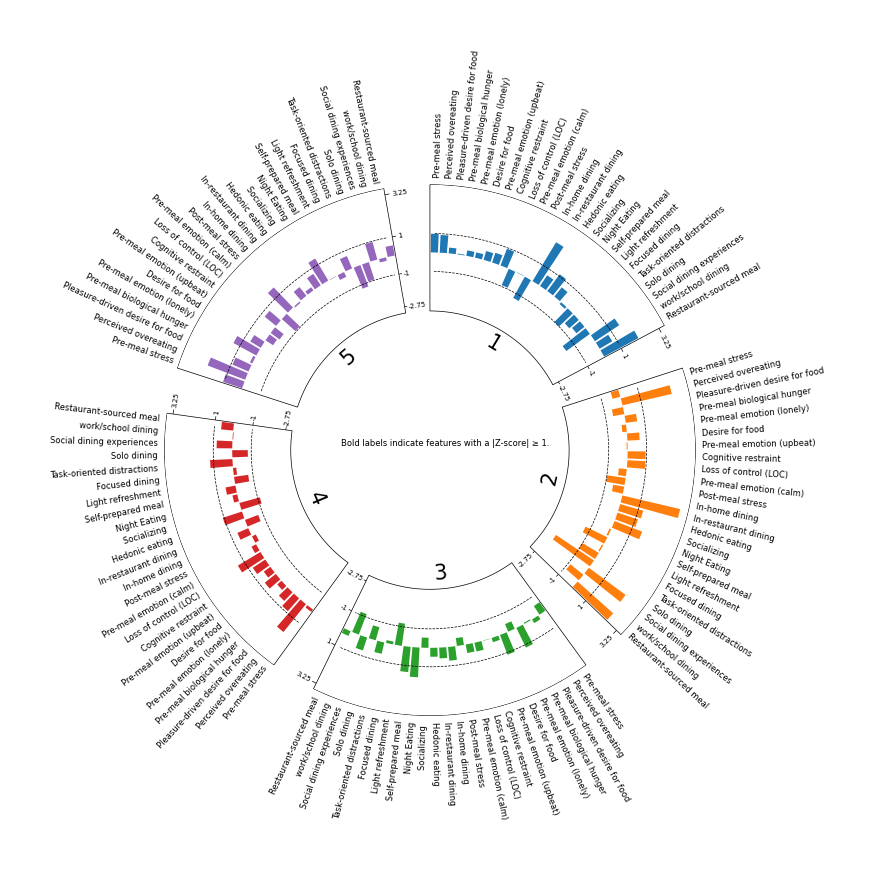

In [1]:
from pycirclize import Circos
import pandas as pd
from pycirclize import Circos
import numpy as np
from pycirclize.parser import Gff
np.random.seed(0)
df = pd.read_excel('ema_zscores_posthoc_phenotype_analysis.xlsx')

sectors_dict = {1: 4, 2: 22, 3: 7, 4: 15, 5: 28}
sectors = {1: df.shape[1], 2: df.shape[1], 3: df.shape[1], 4: df.shape[1], 5: df.shape[1]}
circos = Circos(sectors, space=10)
i=1
for sector in circos.sectors:
 
    x = np.linspace(sector.start + 0.5, sector.end - 0.5, int(sector.size))

    y = df.iloc[[sectors_dict[i]]].values
    vmin, vmax = y[0].min(), y[0].max()
    vmin, vmax = -2.75, 3.25
    # Plot bar (default)
    track1 = sector.add_track((55, 105), r_pad_ratio=0.1)
    track1.axis()
    y_1 = [ 0, 1.75, 3.75, 6]
    y_1_labels = [-2.75,-1, 1,3.25]
    y_labels = list(map(str, y_1_labels))
    track1.bar(x, y[0], vmin =vmin , vmax = vmax )
    y_line = np.ones(int(sector.size))
    track1.line(x, y_line, vmin =vmin , vmax = vmax , color="black", lw=0.5, ls="--")
    track1.line(x, (-1)*y_line, vmin =vmin , vmax = vmax , color="black", lw=0.5, ls="--")
    track1.yticks( y_1,labels = y_labels,label_size=5,)
    track1.xticks_by_interval(0.1, tick_length=1, show_label=False)
    labels = df.columns
    pos_list = x
    track1.xticks(
    pos_list,
    labels,
    label_orientation="vertical",
    show_bottom_line=True,
    label_size=6,
    line_kws=dict(ec="grey"),
)

    
    sector.text(f"{sector.name}", size=15, r=45)
    
    i = i+1

fig = circos.plotfig()

from matplotlib.patches import Patch
# Add legend
handles = [
   Patch(color="none", label='Bold labels indicate features with a |Z-score| ≥ 1.'),


]
_ = fig.legend(handles=handles, bbox_to_anchor=(0.5, 0.475), loc="lower center", fontsize=6)
from matplotlib import pyplot as plt


fig.savefig('polarplot_updated_10_21.pdf')